### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspectra.transformers.spectral_correction import msc, detrend

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

RANDOM_STATE = 135

### Open dataset and check overview

In [2]:
mango = pd.read_excel('Dataset_RawSpectrum_NIRS_for_Intact_Mangoes.xlsx', sheet_name='RawData')
pd.set_option('display.max_rows', None)

In [3]:
mango.head()

,No,Mango Cultivars,Vit C (mg/100g),TA (mg/100g),SSC (oBrix),999.9,1000.3,1000.7,1001.1,1001.4,...,2481.1,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2,label
0,1,Cengkir,62.51267,599.6819,8.695,0.517039,0.516867,0.516921,0.516366,0.516205,...,1.505065,1.505929,1.506978,1.507936,1.508755,1.509356,1.510223,1.510651,1.511547,Cengkir
1,2,Cengkir,58.55433,488.5819,8.825,0.465913,0.465593,0.465691,0.465959,0.465898,...,1.388579,1.390588,1.393135,1.395065,1.396263,1.397289,1.398694,1.400154,1.401989,Cengkir
2,3,Cengkir,62.09600,549.2490,9.225,0.550232,0.549902,0.549755,0.549763,0.549980,...,1.459362,1.460702,1.462801,1.463697,1.463799,1.464256,1.464685,1.465478,1.466563,Cengkir
3,4,Cengkir,62.30433,464.3660,8.965,0.462931,0.462902,0.462700,0.462785,0.462643,...,1.393639,1.395964,1.398350,1.400225,1.401508,1.402762,1.404272,1.405578,1.406921,Cengkir
4,5,Cengkir,46.24100,346.8490,9.435,0.449824,0.449643,0.449870,0.450019,0.449672,...,1.402181,1.404301,1.406622,1.408270,1.410406,1.411573,1.412805,1.414365,1.416021,Cengkir


In [4]:
mango.describe()

,No,Vit C (mg/100g),TA (mg/100g),SSC (oBrix),999.9,1000.3,1000.7,1001.1,1001.4,1001.8,...,2478.7,2481.1,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,93.500000,42.782664,489.452255,15.756698,0.470990,0.470317,0.470073,0.469959,0.469614,0.468830,...,1.529063,1.530619,1.531952,1.533440,1.534393,1.535336,1.536066,1.536951,1.537809,1.538768
std,53.837719,13.686407,167.416709,3.905232,0.067623,0.067513,0.067419,0.067371,0.067330,0.067233,...,0.127583,0.127405,0.127189,0.127041,0.126883,0.126851,0.126799,0.126729,0.126733,0.126758
min,1.000000,18.327000,111.666700,7.910000,0.359705,0.359462,0.359603,0.359467,0.359104,0.358377,...,1.223759,1.226502,1.229511,1.232319,1.234361,1.235337,1.237196,1.238874,1.239891,1.241483
25%,47.250000,33.050330,369.500750,13.108050,0.438271,0.437551,0.437256,0.437129,0.436796,0.436155,...,1.461599,1.463149,1.465169,1.467178,1.468450,1.469866,1.470643,1.471730,1.473176,1.474589
50%,93.500000,40.987850,491.736000,15.422500,0.468262,0.467445,0.466986,0.467068,0.466896,0.466074,...,1.524657,1.525973,1.527454,1.528209,1.529202,1.530279,1.530254,1.531152,1.531543,1.532280
75%,139.750000,52.130782,621.225000,18.660000,0.499109,0.498421,0.498491,0.498465,0.497888,0.497192,...,1.571987,1.574000,1.575753,1.577730,1.579015,1.580222,1.580739,1.581087,1.581512,1.582513
max,186.000000,77.864700,993.833300,25.507000,0.759821,0.758425,0.757702,0.757295,0.756754,0.755493,...,2.455570,2.457048,2.458371,2.458920,2.458715,2.459428,2.459773,2.461786,2.463613,2.465585


### Check for missing and duplicate data

In [5]:
mango.isna().sum().sum()

0

In [6]:
mango.drop('No', axis=1).duplicated().sum()

0

### Check if all Mango Cultivar labels are valid and all numerical data are positive

In [7]:
mango.shape

(186, 1563)

In [8]:
(mango['Mango Cultivars'] == mango['label']).sum()

186

In [9]:
mango['Mango Cultivars'].unique()

array(['Cengkir', 'Kweni', 'Kent', 'Palmer'], dtype=object)

In [10]:
(mango.drop(['No', 'Mango Cultivars', 'label'], axis=1) < 0).sum().sum()

0

### Box plot nutrient data

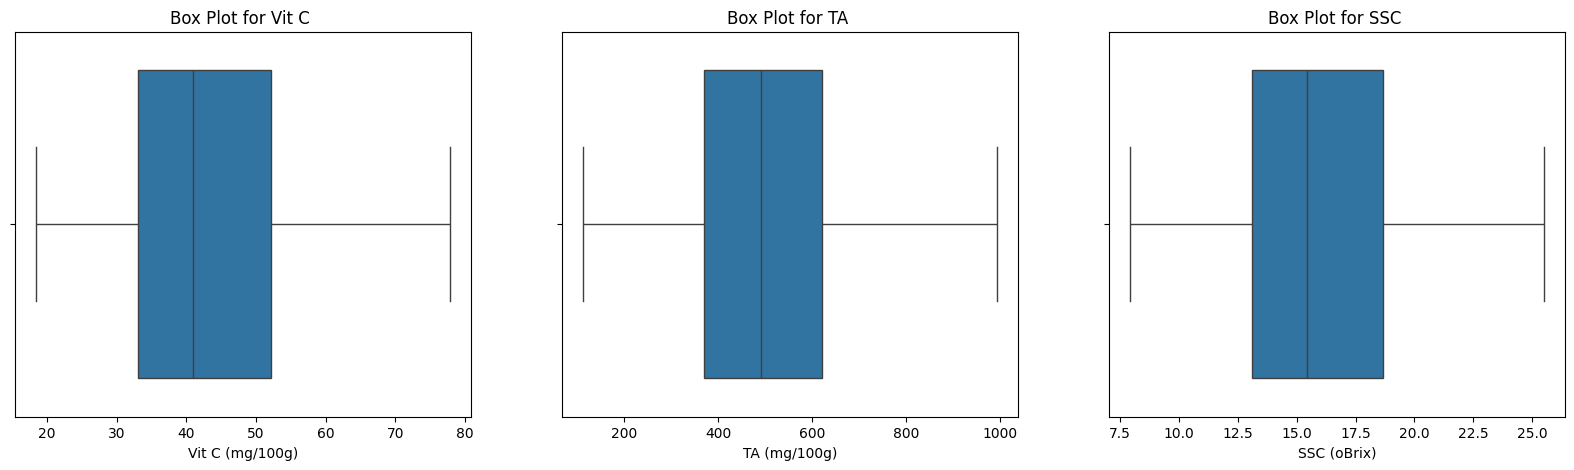

In [11]:
mangoNutri = mango[['Vit C (mg/100g)', 'TA (mg/100g)', 'SSC (oBrix)']]

plt.figure(figsize=(20, 5))

for i, col in enumerate(mangoNutri.columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(mangoNutri[col], orient='h')
    plt.title(f'Box Plot for {col.split("(")[0]}')

plt.show()

### Line plot spectral data

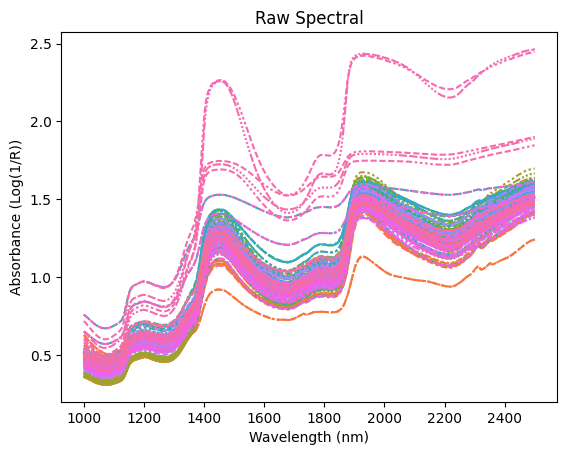

In [12]:
mangoSpectral = mango.drop(['No', 'Mango Cultivars', 'Vit C (mg/100g)', 'TA (mg/100g)', 'SSC (oBrix)', 'label'], axis=1)
sns.lineplot(mangoSpectral.T, legend=False)
plt.title('Raw Spectral')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (Log(1/R))')
plt.show()

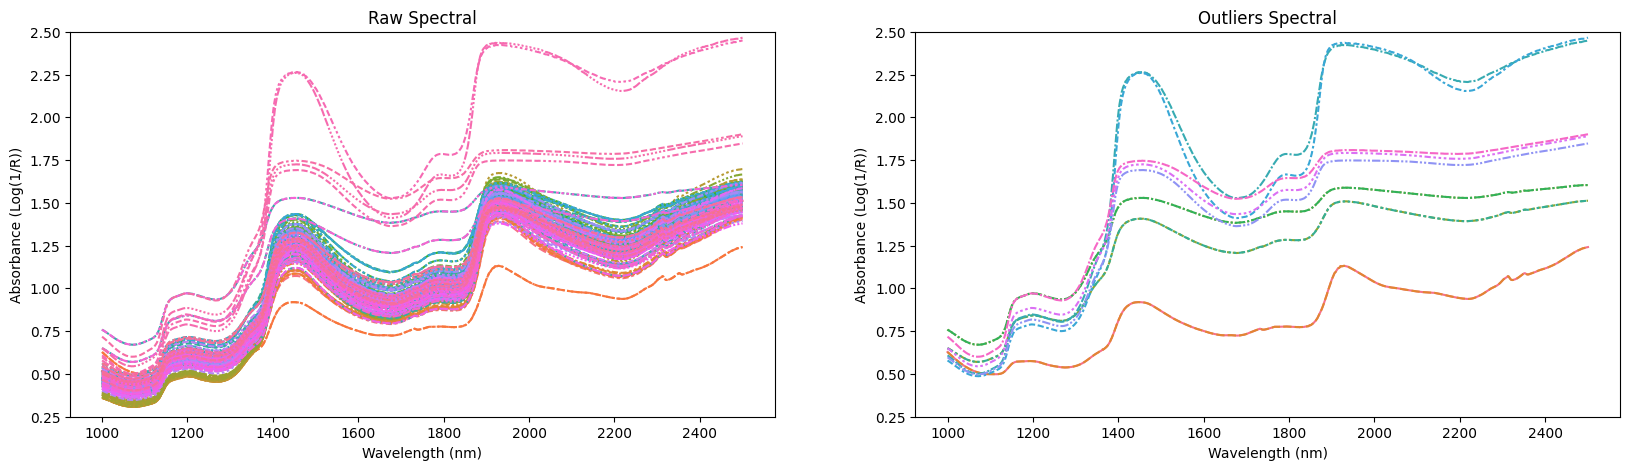

In [13]:
mangoBadSpectral = pd.concat([mangoSpectral[mangoSpectral[1700.2] > 1.2], mangoSpectral[mangoSpectral[1700.2] < 0.8]])

f, ax = plt.subplots(1, 2, figsize=(20, 5))

plt.axes(ax[0])
sns.lineplot(mangoSpectral.T, legend=False)
ax[0].set_title("Raw Spectral")
ax[0].set_xlabel("Wavelength (nm)")
ax[0].set_ylabel('Absorbance (Log(1/R))')
ax[0].set_ylim(0.25, 2.5)

plt.axes(ax[1])
sns.lineplot(mangoBadSpectral.T, legend=False)
ax[1].set_title('Outliers Spectral')
ax[1].set_xlabel('Wavelength (nm)')
ax[1].set_ylabel('Absorbance (Log(1/R))')
ax[1].set_ylim(0.25, 2.5)

plt.show()

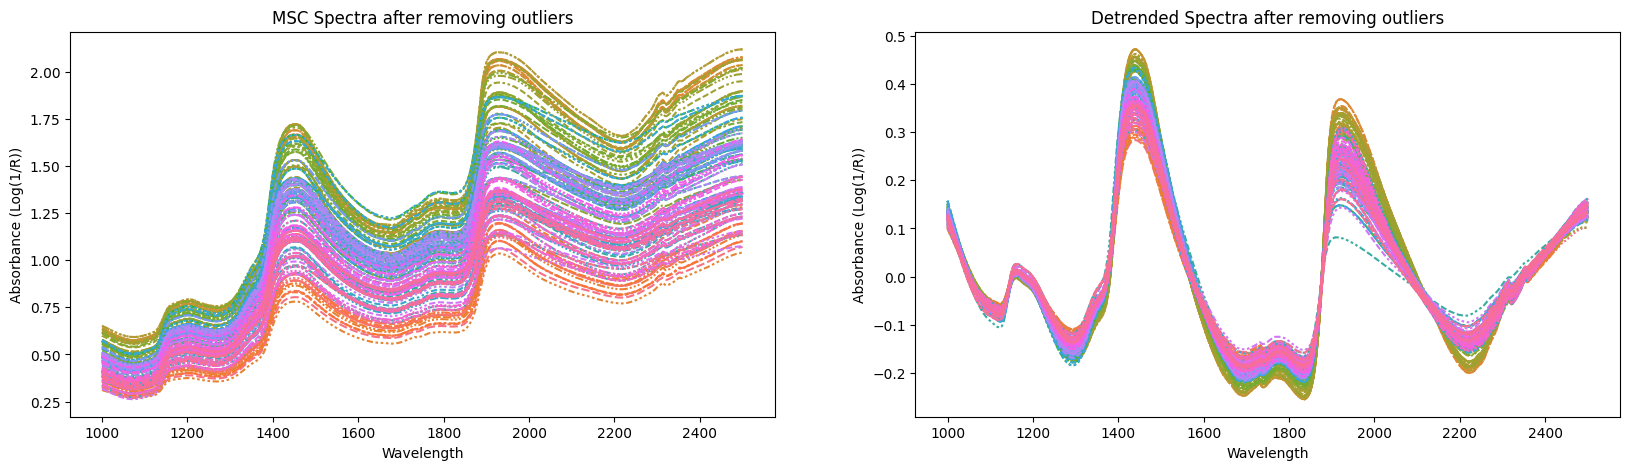

In [14]:
mangoPrep = mangoSpectral.drop(mangoBadSpectral.index)

f, ax = plt.subplots(1, 2, figsize=(20, 5))

MSC = msc()
MSC.fit(mangoPrep)
mangoMSC = MSC.transform(mangoPrep)

plt.axes(ax[0])
sns.lineplot(mangoMSC.T, legend=False)
ax[0].set_title("MSC Spectra after removing outliers")
ax[0].set_xlabel("Wavelength")
ax[0].set_ylabel('Absorbance (Log(1/R))')

DT = detrend()
mangoDT = DT.fit_transform(spc=mangoPrep, wave=list(mangoPrep.columns))

plt.axes(ax[1])
sns.lineplot(mangoDT.T, legend=False)
ax[1].set_title("Detrended Spectra after removing outliers")
ax[1].set_xlabel("Wavelength")
ax[1].set_ylabel('Absorbance (Log(1/R))')

plt.show()

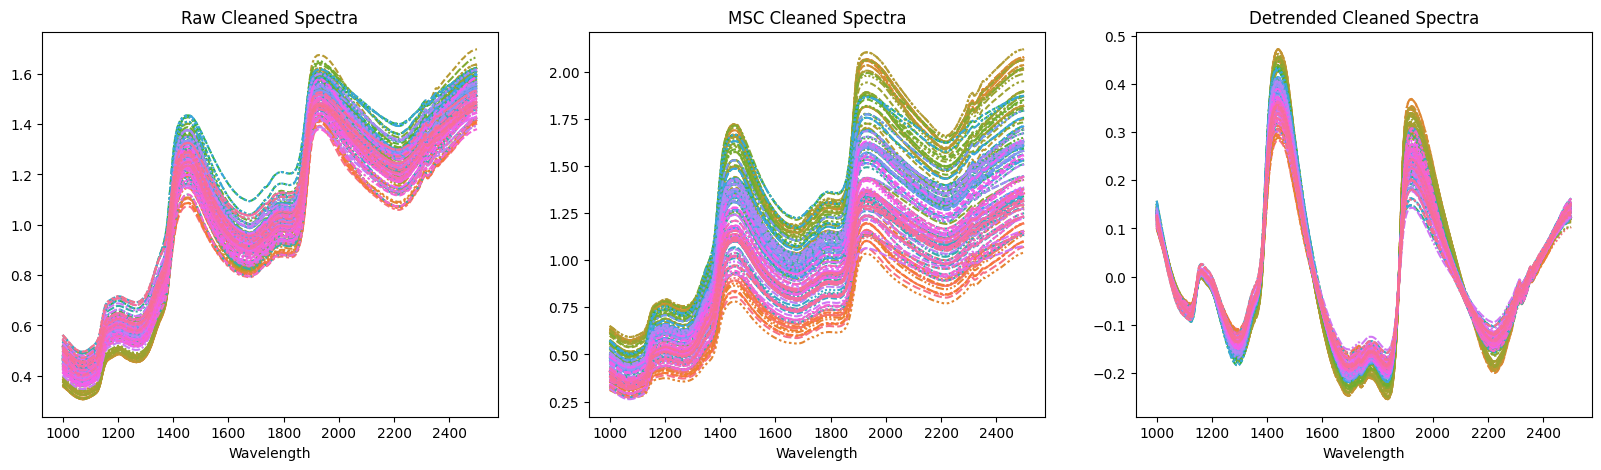

In [15]:
mangoCleanSpectral = mangoPrep.drop(mangoDT[mangoDT[1912] < 0.1].index)

mangoMSC = MSC.transform(mangoCleanSpectral)
mangoDT = DT.fit_transform(spc=mangoCleanSpectral, wave=list(mangoCleanSpectral.columns))

f, ax= plt.subplots(1, 3, figsize=(20, 5))
plt.axes(ax[0])
sns.lineplot(mangoCleanSpectral.T)
ax[0].set_title("Raw Cleaned Spectra")
ax[0].set_xlabel("Wavelength")
ax[0].get_legend().remove()

plt.axes(ax[1])
sns.lineplot(mangoMSC.T)
ax[1].set_title("MSC Cleaned Spectra")
ax[1].set_xlabel("Wavelength")
ax[1].get_legend().remove()

plt.axes(ax[2])
sns.lineplot(mangoDT.T)
ax[2].set_title("Detrended Cleaned Spectra")
ax[2].set_xlabel("Wavelength")
ax[2].get_legend().remove()

plt.show()

# help why is it so bad

In [17]:
mangoFinal = mango.iloc[mangoCleanSpectral.index]

In [22]:
# liblinear is good for small dataset and suppports both L1 and L2 regularization
logReg = LogisticRegression(solver='saga', class_weight='balanced', max_iter=5000, random_state=RANDOM_STATE)
kFold = KFold(5, shuffle=True, random_state=RANDOM_STATE)
hyperLogReg = {
    'C': 1 / np.logspace(-5, 2, 50),
    'penalty': ['l1', 'l2']
}

In [23]:
trainX = mangoFinal[['Vit C (mg/100g)', 'TA (mg/100g)', 'SSC (oBrix)']]
trainY = mangoFinal[['Mango Cultivars']]
trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=0.2, random_state=RANDOM_STATE)

scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
validX = scaler.transform(validX)

smote = SMOTE(random_state=RANDOM_STATE)
trainX, trainY = smote.fit_resample(trainX, trainY)

In [24]:
gridLogReg = GridSearchCV(logReg, hyperLogReg, cv=kFold, scoring='f1_macro', refit='f1_macro')
gridLogReg.fit(trainX, trainY.values.ravel())

predictTrainYLogReg = gridLogReg.predict(trainX)
predictValidYLogReg = gridLogReg.predict(validX)
print(f"Best parameters: {gridLogReg.best_params_}")

Best parameters: {'C': 0.37275937203149456, 'penalty': 'l1'}


In [25]:
print(classification_report(trainY, predictTrainYLogReg))
print(classification_report(validY, predictValidYLogReg))

              precision    recall  f1-score   support

     Cengkir       0.70      0.96      0.81        69
        Kent       0.60      0.71      0.65        69
       Kweni       0.54      0.45      0.49        69
      Palmer       0.61      0.39      0.48        69

    accuracy                           0.63       276
   macro avg       0.62      0.63      0.61       276
weighted avg       0.62      0.63      0.61       276

              precision    recall  f1-score   support

     Cengkir       0.25      0.50      0.33         2
        Kent       0.67      0.75      0.71        16
       Kweni       0.50      0.33      0.40         6
      Palmer       0.44      0.36      0.40        11

    accuracy                           0.54        35
   macro avg       0.47      0.49      0.46        35
weighted avg       0.54      0.54      0.54        35

